# Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs
### Data Definition
•	age: Age of the policyholder (Numeric)

•	sex: Gender of the policyholder (Categoric)

•	weight: Weight of the policyholder (Numeric)

•	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

•	no_of_dependents: Number of dependent persons on the policyholder (Numeric)

•	smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

•	claim: The amount claimed by the policyholder (Numeric) in dollars

•	blood pressure: Blood pressure reading of policyholder (Numeric)

•	diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

•	regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)

•	job_title: Job profile of the policyholder (Categoric)

•	city: The city in which the policyholder resides (Categoric) 

•	hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams["figure.figsize"]=[15,6]
import warnings
warnings.filterwarnings("ignore")

In [20]:
health=pd.read_csv("healthinsurance.csv")
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


# Roadmap Ahead

* Univariate Analysis
* Bivariate Analysis
* Missing values if any- since it is an insurance data, we do not remove the outluers
* feature engineering

### Model Building

* split the data into trim and train
* Statistical model of linear regression -R2, MAE, MSE, RMSE & MAPE
* Using sklearn - Ridge, Lasso, Elastic net models and SGD
* cross validation

In [21]:
#Check the shape

health.shape

(15000, 13)

In [22]:
#check the info and dtypes- the object shouldnt get as an int and int shouldnt have letters

health.info()

#we need to convert the Smoker and regular ex in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


# Univariate Analysis

#when do you do univariate analysis?


In [23]:
#split the data into num and cat variables

health.select_dtypes(include=np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

In [24]:
num_cols=['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure',
        'claim']

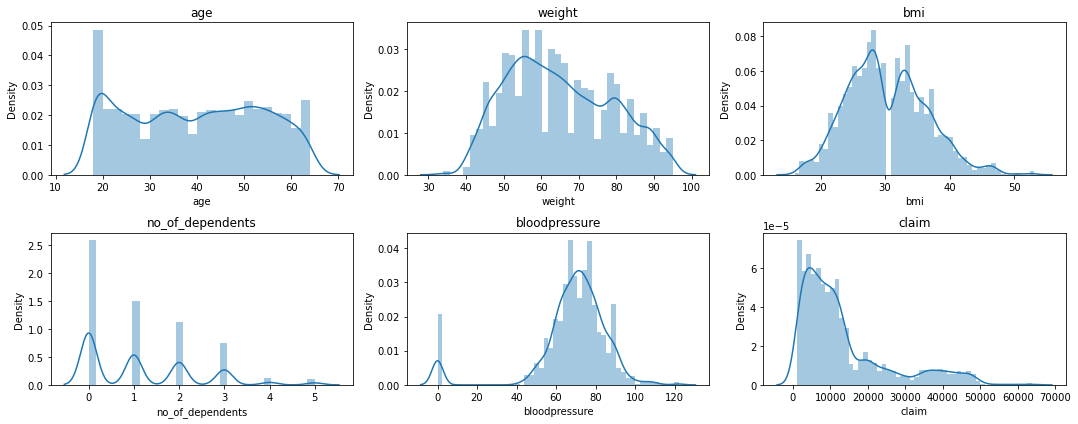

In [25]:
nrows=2
ncols=3
iterator=1

for i in num_cols:
    plt.subplot(nrows,ncols, iterator)
    sns.distplot(health.loc[:,i]) #will return the shape of the data
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

### inference

* age is uniformly distributed
* bmi appears to be bimodal in nature
* weight is normal in shape
* no of dependents vary from 0 to 5
* blood pressure is normal however there are alot of zeros
* claim is positively skewed


In [32]:
health.select_dtypes(exclude=np.number).columns

Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')

In [33]:
cat_cols=['sex','hereditary_diseases', 'regular_ex','diabetes','smoker'] #we are including diabetes, regular exercise and diabetes
#because there are 0 and 1 categories

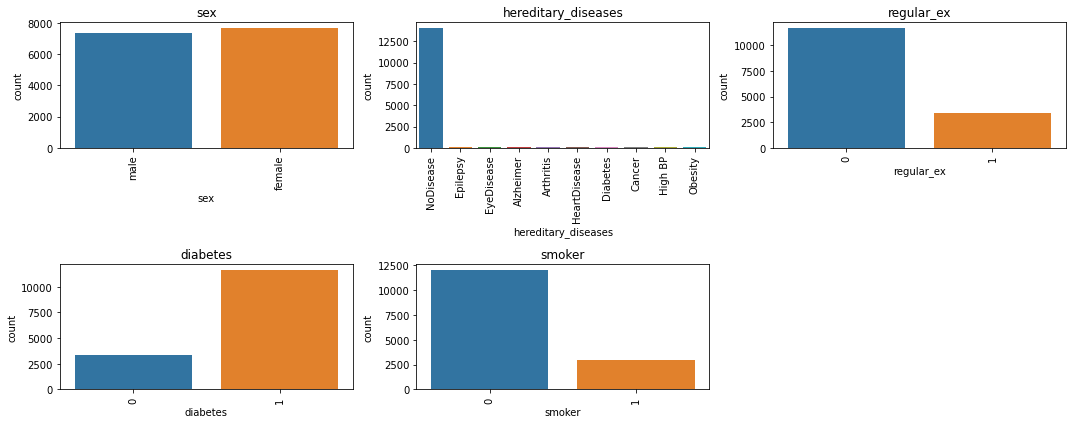

In [34]:
nrows=2
ncols=3
iterator=1

for i in cat_cols:
    plt.subplot(nrows,ncols, iterator)
    sns.countplot(health.loc[:,i])
    plt.xticks(rotation=90) #will return the shape of the data
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

# Inference

* More females than males

* more people who got the insurance are diabetic

* most of the people are non smokers

* most of the people dont have any hereditary disease

* most of the people dont exercise--- leads to high BMI and more weight

In [35]:
#Check the job Title

health.job_title.value_counts()[:5].index

Index(['Student', 'HomeMakers', 'Singer', 'Actor', 'FilmMaker'], dtype='object')

In [36]:
#To check the city

health.city.value_counts()[:5].index

Index(['NewOrleans', 'Nashville', 'Charleston', 'Brimingham', 'Memphis'], dtype='object')

### Bivariate Analysis

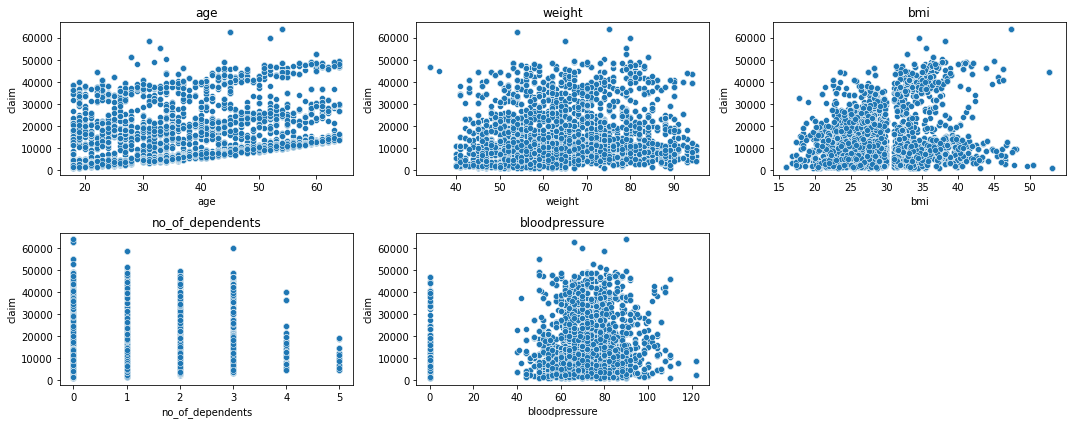

In [37]:
#num vs num


num_cols=['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']

nrows=2
ncols=3
iterator=1

for i in num_cols:
   
        plt.subplot(nrows,ncols, iterator)
        sns.scatterplot(data=health, x=i, y="claim")
        iterator+=1
        plt.title(i)
plt.tight_layout()
plt.show()

### inference

* As age increases , claim also increases
* As BMI increases , claims amounts have an increasing pattern
* In case of no of dependents, as the dependents increase, the claim amounts decrease
* in blood pressure, we have a lot of 0s, we need to fix that- anomaly(anomalous data)
* between weight and claim, there is no such pattern

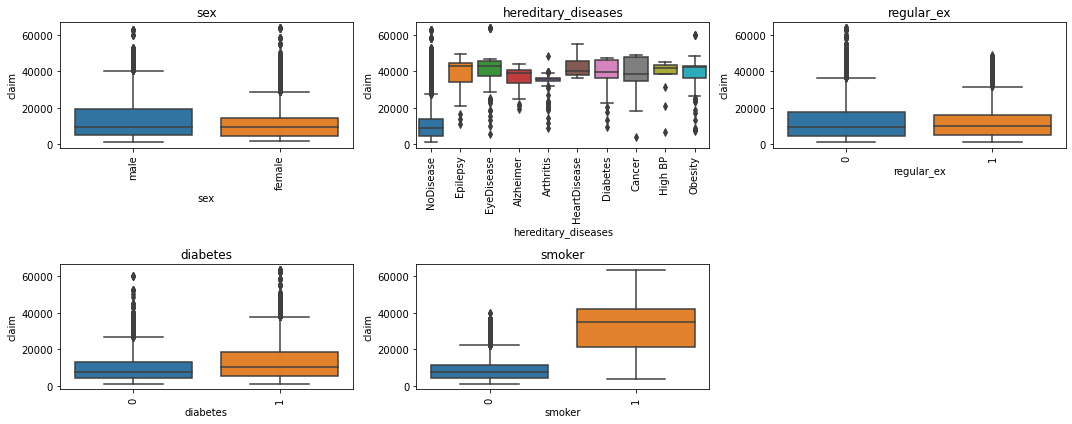

In [38]:
#num vs cat

cat_cols=['sex','hereditary_diseases', 'regular_ex','diabetes','smoker']

nrows=2
ncols=3
iterator=1

for i in cat_cols:
   
        plt.subplot(nrows,ncols, iterator)
        sns.boxplot(data=health, x=i, y="claim")
        iterator+=1
        plt.xticks(rotation=90)
        plt.title(i)
plt.tight_layout()
plt.show()

In [39]:
### Inference

* Irrespective of gender the claim amount is same, the claimed amount by males is a little higher, but median is close
* 

SyntaxError: invalid syntax (1907884238.py, line 3)

In [ ]:
sns.boxplot(data=health,x="hereditary_diseases", y="claim")
plt.show()

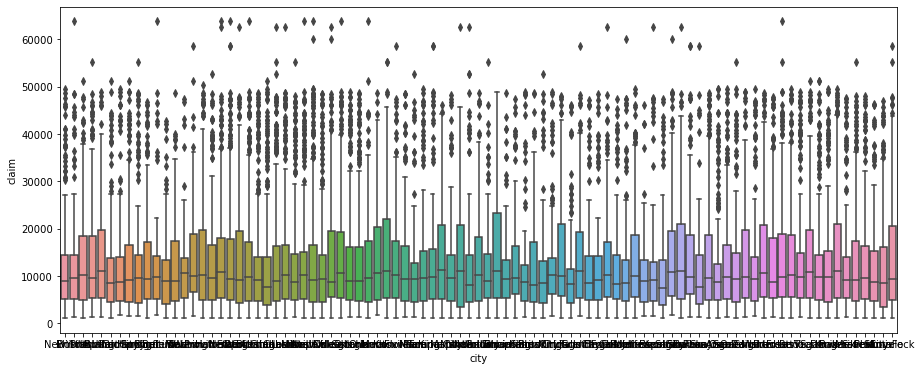

In [40]:
sns.boxplot(data=health,x="city", y="claim") #bin them into north, west, east, south
plt.show()

In [41]:
health.city.unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

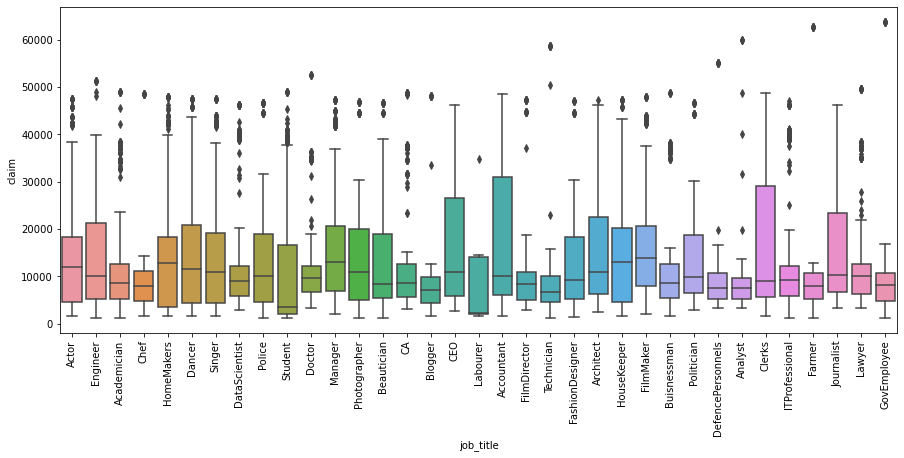

In [42]:
sns.boxplot(data=health,x="job_title", y="claim")
plt.xticks(rotation=90)
plt.show()

In [43]:
health.job_title.unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [44]:
#we cannot bin the job title on any basis so its better to do target encoding or frequency encoding
#Bin the job title basis the target

health.groupby("job_title")["claim"].describe() #impute median because mean is not equal to median

health.groupby("job_title")["claim"].median() 

job_title
Academician           8538.30
Accountant            9957.70
Actor                11882.00
Analyst               7627.00
Architect            10825.30
Beautician            8310.80
Blogger               7046.70
Buisnessman           8534.70
CA                    8522.00
CEO                  10807.50
Chef                  8026.70
Clerks                8964.10
Dancer               11454.00
DataScientist         9030.30
DefencePersonnels     7623.50
Doctor                9583.90
Engineer             10097.00
Farmer                7933.15
FashionDesigner       9290.10
FilmDirector          8342.90
FilmMaker            13937.70
GovEmployee           8233.10
HomeMakers           12914.00
HouseKeeper          12949.20
ITProfessional        9222.40
Journalist           10197.80
Labourer              2219.50
Lawyer               10085.90
Manager              12928.80
Photographer         10942.10
Police               10051.80
Politician            9890.55
Singer               11013.70


In [45]:
#target encoding basis median

median=health.groupby("job_title")["claim"].median().to_dict()
health["job_title"]=health.job_title.map(median)

In [46]:
#target encoding for city(convert to NEWS bins is optimum)

median1=health.groupby("city")["claim"].median().to_dict()
health["city"]=health.city.map(median1)

In [47]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7


### Missing Values Treatment

In [48]:
health.isnull().sum()[health.isnull().sum()!=0]

age    396
bmi    956
dtype: int64

In [49]:
#pull the df where the age is missing

health.loc[health.age.isnull()].head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
76,NaN,female,88,29.6,NoDisease,1,0,10597.4,78,0,0,11013.7,3947.4
82,NaN,female,64,24.6,NoDisease,2,0,9861.0,70,0,1,9030.3,4529.5


In [50]:
health.groupby("sex")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,7387.0,39.361040,14.111861,18.0,26.0,40.0,51.5,64.0
male,7217.0,39.738395,13.915518,18.0,27.0,40.0,52.0,64.0


In [ ]:
trans=health.groupby(["sex"])["age"].transform("median")

In [51]:
#missing values based on gender- age

health.loc[(health.sex=="male")&(health.age.isnull()), "age"]=40
health.loc[(health.sex=="female")&(health.age.isnull()), "age"]=40

In [52]:
health.isnull().sum()

age                      0
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [53]:
#Missing values based on sex, regular---- bmi

health.groupby(["sex", "regular_ex"])["bmi"].describe()

count       mean       std   min   25%   50%   75%   max
sex    regular_ex                                                           
female 0           5714.0  29.820791  6.054685  16.8  25.4  28.8  33.8  48.1
       1           1551.0  29.761702  5.721222  17.3  25.5  29.0  33.3  49.6
male   0           5211.0  31.024717  6.312529  16.0  26.1  31.1  35.5  52.6
       1           1568.0  29.869452  5.866444  16.8  25.5  29.3  34.1  53.1

In [54]:
#imputing median with respect to sex and exercise in bmi null values

health.loc[(health.sex=="male")&(health.regular_ex==0)&(health.bmi.isnull()), "bmi"]=31.1

health.loc[(health.sex=="male")&(health.regular_ex==1)&(health.bmi.isnull()), "bmi"]=29.3

health.loc[(health.sex=="female")&(health.regular_ex==0)&(health.bmi.isnull()), "bmi"]=28.8

health.loc[(health.sex=="female")&(health.regular_ex==1)&(health.bmi.isnull()), "bmi"]=29

In [55]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7


In [56]:
#in blood pressure, there were missing values, so we are going to eliminate the anomalous data


health.groupby(["smoker","sex", "regular_ex"])["bloodpressure"].describe()

count       mean        std  min   25%   50%  \
smoker sex    regular_ex                                                  
0      female 0           4961.0  68.704092  17.388583  0.0  62.0  70.0   
              1           1396.0  69.222063  21.093633  0.0  64.0  72.0   
       male   0           4279.0  67.004674  21.073381  0.0  62.0  70.0   
              1           1392.0  72.466236  18.676989  0.0  68.0  74.0   
1      female 0           1027.0  72.188900  15.152228  0.0  66.0  72.0   
              1            268.0  65.626866  28.210730  0.0  62.0  72.0   
       male   0           1371.0  67.175055  18.409693  0.0  62.0  70.0   
              1            306.0  68.196078  24.781817  0.0  67.0  73.0   

                            75%    max  
smoker sex    regular_ex                
0      female 0           78.00  122.0  
              1           80.00  110.0  
       male   0           78.00  122.0  
              1           84.00  114.0  
1      female 0           81.50  110.0  
              1           80.25  108.0  
       male   0           78.00  107.0  
              1           80.75  104.0

In [57]:
labels=health['hereditary_diseases'].unique()
labels

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [58]:
#imputing median based on hereditary diseases for bloodpressure

for i in labels:
    health.loc[(health.hereditary_diseases==i)&
               (health.bloodpressure==0),"bloodpressure"]=health.loc[health.hereditary_diseases==i, "bloodpressure"].median()
               

<AxesSubplot:xlabel='bloodpressure', ylabel='claim'>

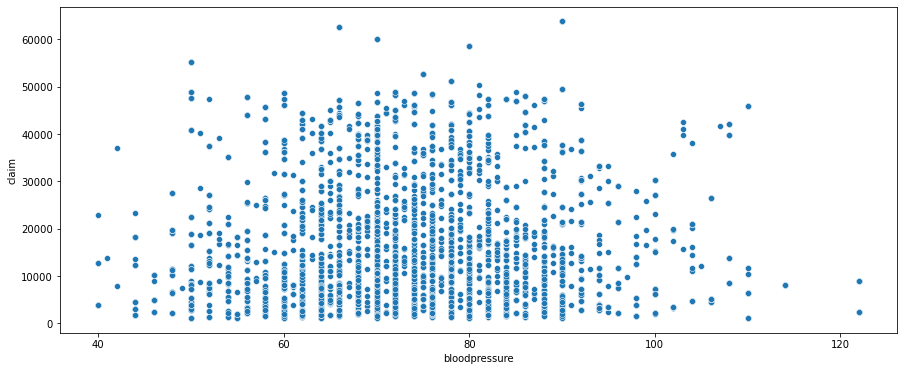

In [59]:
sns.scatterplot(health["bloodpressure"], health["claim"])

### Feature Engineering

* Target encoding -job_title and city 
* Basis BMI- create a new var- Obese and Not Obese
* Diseases- Fatal and Non Fatal
* Height- using weight and BMI

In [60]:
#creating height variable using weight and bmi

health["height"]=np.sqrt(health["age"]/health["bmi"])
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6,1.571348
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0,1.472461
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2,1.340803
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6,1.294536
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7,0.960380


In [61]:
#Fatal diseases

health.hereditary_diseases.unique()

fatals=['Diabetes', 'Cancer','HeartDisease','Alzheimer','High BP','Obesity']

In [62]:
def diseases(x):
    if x in fatals:
        return "Fatal"
    else:
        return "Non Fatal"

In [63]:
health["diseases_cat"]=health["hereditary_diseases"].apply(diseases)
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,diseases_cat
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6,1.571348,Non Fatal
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0,1.472461,Non Fatal
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2,1.340803,Non Fatal
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6,1.294536,Non Fatal
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7,0.960380,Non Fatal


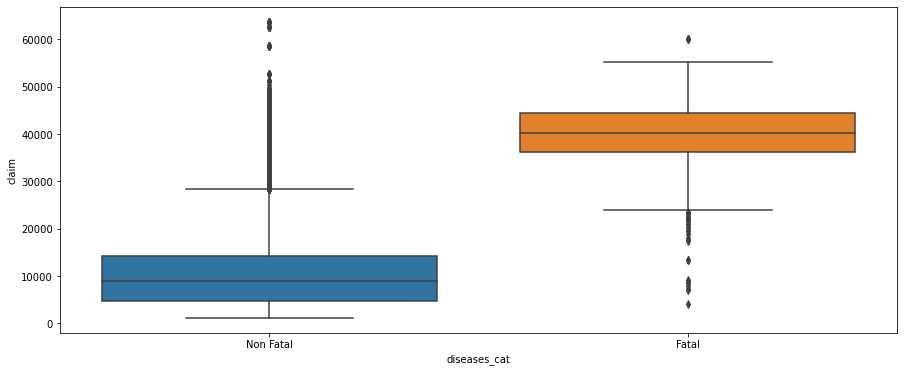

In [64]:
sns.boxplot(health["diseases_cat"], health["claim"])
plt.show()

#so fatal claimed more insurance than non fatal

In [65]:
#BMI- Obese and non Obese based on bins
#Underweight- below 18.5
#normal-18.5-24.9
#overweight-25-30
#Obese-above 30

#Binning of numerical variable in a categorical variable

health["weight_cat"]=pd.cut(x=health["bmi"],bins=(0,18.5,24.9,30,150), 
                            labels=["Underweight","Normal","Overweight", "Obese"])
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,diseases_cat,weight_cat
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6,1.571348,Non Fatal,Normal
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0,1.472461,Non Fatal,Normal
2,32.0,female,64,17.8,Epilepsy,2,1,10247.90,88,1,1,8538.3,32734.2,1.340803,Non Fatal,Underweight
3,61.0,female,53,36.4,NoDisease,1,1,9510.25,72,1,0,8026.7,48517.6,1.294536,Non Fatal,Obese
4,19.0,female,50,20.6,NoDisease,0,0,10968.80,82,1,0,12914.0,1731.7,0.960380,Non Fatal,Normal


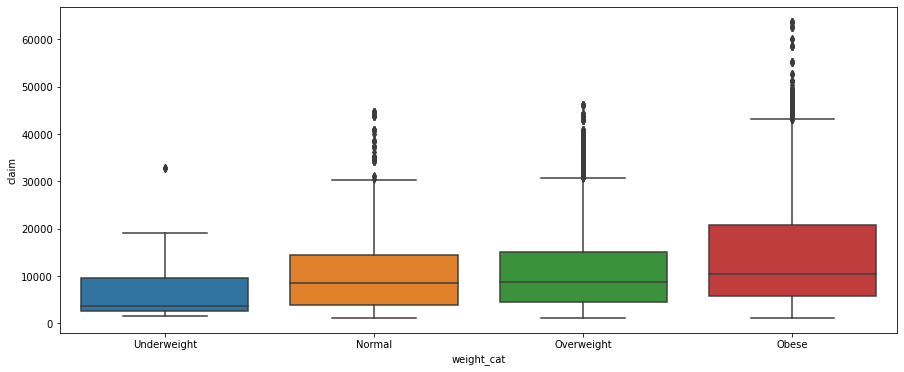

In [66]:
sns.boxplot(health["weight_cat"], health["claim"])
plt.show()

#Obese people get the most claim

### Can also bin the age --very versatile so can do it if required

### Dropping the Unrequired variables after Feature Engineering

* drop Hereditary Diseases

In [67]:
health.drop("hereditary_diseases", axis=1, inplace=True)

In [68]:
health

,age,sex,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,diseases_cat,weight_cat
0,60.0,male,64,24.3,1,0,8948.10,72,0,0,11882.00,13112.6,1.571348,Non Fatal,Normal
1,49.0,female,75,22.6,1,0,9554.35,78,1,1,10097.00,9567.0,1.472461,Non Fatal,Normal
2,32.0,female,64,17.8,2,1,10247.90,88,1,1,8538.30,32734.2,1.340803,Non Fatal,Underweight
3,61.0,female,53,36.4,1,1,9510.25,72,1,0,8026.70,48517.6,1.294536,Non Fatal,Obese
4,19.0,female,50,20.6,0,0,10968.80,82,1,0,12914.00,1731.7,0.960380,Non Fatal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,1,1,9327.65,54,1,0,13937.70,21082.2,1.173922,Non Fatal,Overweight
14996,39.0,male,74,29.6,4,0,9290.10,64,1,0,3597.60,7512.3,1.147853,Non Fatal,Overweight
14997,20.0,male,62,33.3,0,0,9520.40,52,1,0,9290.10,1391.5,0.774984,Non Fatal,Obese
14998,52.0,male,88,36.7,0,0,9861.90,70,1,0,7933.15,9144.6,1.190333,Non Fatal,Obese


### Statistical Analysis

* Num Vs Num- T test
* Cat Vs Num(Tgt) - Anova
* Cat Vs Cat - Chi **here our target variable is not categorical so we are not going to do this**

**Note: When we do this kind of tests, there is a litmus test to be applied**

* Litmus test are Normality Test and Equality of Variance tests
* If these litmus tests fail, then we cant apply the parametric test- shapiro and levene 
* we will have to apply Non Parametric test, which are mannwhitneyu, kruskal

In [69]:
#find the num variables

health.select_dtypes(include=np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'city',
       'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim',
       'height'],
      dtype='object')

### T test- for num variables

### Litmus Test- Normality:

In [70]:
#Litmus Test- Normality:

num_cols=['age', 'weight', 'bmi', 'city',
       'bloodpressure', 'job_title', 'claim',
       'height']

for i in num_cols:
    print("P Value for", i, "is",stats.jarque_bera(health[i])[1])

P Value for age is 0.0
P Value for weight is 0.0
P Value for bmi is 0.0
P Value for city is 0.000249109703297723
P Value for bloodpressure is 0.0
P Value for job_title is 0.0
P Value for claim is 0.0
P Value for height is 0.0


In [71]:
#Since the P value<0.05, so we reject Ho and there fore data is not Normal

### Non parametric Test- since data is not normal
* mannwhitney u test

In [72]:
import scipy.stats as stats

In [73]:
num_cols

['age',
 'weight',
 'bmi',
 'city',
 'bloodpressure',
 'job_title',
 'claim',
 'height']

In [77]:
for i in num_cols:
    if i not in "claim":
        if stats.ttest_rel(health[i],health["claim"])[1]<0.05:
            print(i,stats.ttest_rel(health[i],health["claim"]))

age Ttest_relResult(statistic=-134.75563092272182, pvalue=0.0)
weight Ttest_relResult(statistic=-134.46611490977946, pvalue=0.0)
bmi Ttest_relResult(statistic=-134.81695120217728, pvalue=0.0)
city Ttest_relResult(statistic=-39.21435027307461, pvalue=0.0)
bloodpressure Ttest_relResult(statistic=-134.38577503855532, pvalue=0.0)
job_title Ttest_relResult(statistic=-37.56504047066075, pvalue=3.1086291298756437e-295)
height Ttest_relResult(statistic=-135.09777970186877, pvalue=0.0)


In [14]:
stats.ttest_rel(health["age"], health["claim"])

Ttest_relResult(statistic=nan, pvalue=nan)

In [17]:
num=health.select_dtypes(include=np.number).columns

for i in num:
        print(stats.ttest_ind(health.loc[:,i], health["claim"])[1])

AttributeError: module 'scipy.stats' has no attribute 'ttest'

In [ ]:
#Ho: That the feature does not carry any significance for the target
#Ha: That the feature is significant var for the target

for i in num_cols:
    print("P value for ",i,"is",stats.mannwhitneyu(health[i], health["claim"])[1])

### Conclusion: 
As p value>0.05 for Job title and City, we fail to reject the claim so these variables have no significance for the target, which leads to dropping these two variables before final model building


### Kruskall Wallis Test- Anova Non parametric test

#since normality assumption has gone for a toss- we cant apply anova so we apply a similar test for Anova

In [ ]:
#for this code to work out, all categories need to be shifted to numbers

#stats.kruskal(health.diseases_cat, health.claim)

In [ ]:
health.diseases_cat.unique()

In [ ]:
fatal=health.loc[health.diseases_cat=="Fatal", "claim"]
nfatal=health.loc[health.diseases_cat=="Non Fatal", "claim"]

#but since there are so many categories, we cant do this for every category

stats.kruskal(fatal,nfatal)

In [ ]:
fatal=health.loc[health.smoker==1, "claim"]
nfatal=health.loc[health.smoker==0, "claim"]
stats.kruskal(fatal,nfatal)

In [ ]:
fatal=health.loc[health.regular_ex==1, "claim"]
nfatal=health.loc[health.regular_ex==0, "claim"]
stats.kruskal(fatal,nfatal) #not significant variable

In [ ]:
fatal=health.loc[health.diabetes==1, "claim"]
nfatal=health.loc[health.diabetes==0, "claim"]
stats.kruskal(fatal,nfatal) 

In [ ]:
uw=health.loc[health.weight_cat=="Underweight", "claim"]
n=health.loc[health.weight_cat=="Normal", "claim"]
o=health.loc[health.weight_cat=="Obese", "claim"]
ov=health.loc[health.weight_cat=="Overweight", "claim"]

stats.kruskal(uw,n,o,ov) 

In [ ]:
fatal=health.loc[health.sex=="male", "claim"]
nfatal=health.loc[health.sex=="female", "claim"]
stats.kruskal(fatal,nfatal) 

In [ ]:
a=health.loc[health.no_of_dependents==0, "claim"]
b=health.loc[health.no_of_dependents==1, "claim"]
c=health.loc[health.no_of_dependents==2, "claim"]
d=health.loc[health.no_of_dependents==3, "claim"]
e=health.loc[health.no_of_dependents==4, "claim"]
f=health.loc[health.no_of_dependents==5, "claim"]

stats.kruskal(a,b,c,d,e,f) 

### dropping all insignificant columns

In [ ]:
#dropping all insignificant columns

finaldata=health.drop(["job_title","city","regular_ex"], axis=1)

### apply pd.get_dummies - one hot encoding

In [ ]:
#apply pd.get_dummies - one hot encoding

finalcut=pd.get_dummies(finaldata, drop_first=True)

### Model Building

* Split the data in Train and Test
* Statistical Model
* Ridge, lasso, Elastic Net Model
* Interaction Effect Model
* SGD Model
* K fold Cross Validation Model

In [ ]:
#splitting the data into train and test


from sklearn.model_selection import train_test_split, KFold

x=finalcut.drop("claim", axis=1)
y=finalcut["claim"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7, random_state=123)

In [ ]:
#import Linear regression and other models

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
import statsmodels.api as sma
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Statistical model- Linear Regression

In [ ]:
#Statistical model- Linear Regression

temp_xtrain=sma.add_constant(xtrain)
temp_xtest=sma.add_constant(xtest)

statmodel=sma.OLS(ytrain,temp_xtrain).fit()
statmodel.summary()

pred_tr=statmodel.predict(temp_xtrain)
pred_test= statmodel.predict(temp_xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE_train=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/2
MAE_test=mean_absolute_error(ytest, pred_test)
#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE Train:", MAE_train)
print("MAE Test:", MAE_test)


#RMSE of 6000 tells us that the model predictions is deviating by 6000 dollars

#p value- weight, bmi, etc is lesser than 0.05- not required variables in a way

In [ ]:
#Ridge regression

from sklearn.model_selection import GridSearchCV

#defining params

ridge=Ridge()

params=({"alpha":[0.1,0.001,0.01,0.5,0.9,1,2,3,4,5,6,7,8,9,10]})

grid=GridSearchCV(estimator=ridge, param_grid=params, cv=5)

grid.fit(x,y)

print(grid.best_params_)

In [ ]:
ridge=Ridge(alpha=0.5, normalize=True)


ridgemodel=ridge.fit(xtrain, ytrain)
#ridgemodel.summary()

pred_tr=ridgemodel.predict(xtrain)
pred_test= ridgemodel.predict(xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/2

#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE:", MAE)

#RMSE of 7000 tells us that the model predictions is deviating by 7000 dollars
#Ridge model inc RMSE- problem with bias model

In [ ]:
#Lasso regression

from sklearn.model_selection import GridSearchCV

#defining params

lasso=Lasso()

params=({"alpha":[0.1,0.001,0.01,0.5,0.9,1,2,3,4,5,6,7,8,9,10]})

grid=GridSearchCV(estimator=lasso, param_grid=params, cv=5)

grid.fit(x,y)

print(grid.best_params_)

In [ ]:
lasso=Lasso(alpha=0.5, normalize=True)


lassomodel=lasso.fit(xtrain, ytrain)
#lassomodel.summary()

pred_tr=lassomodel.predict(xtrain)
pred_test= lassomodel.predict(xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/2

#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE:", MAE)

#RMSE of 6000 tells us that the model predictions is deviating by 6000 dollars
#Lasso model is the same as linear Regression almost

In [ ]:
#ElasticNet regression

from sklearn.model_selection import GridSearchCV

#defining params

enet=ElasticNet()

params=({"alpha":[0.1,0.001,0.01,0.5,0.9,1,2,3,4,5,6,7,8,9,10]})

grid=GridSearchCV(estimator=enet, param_grid=params, cv=5)

grid.fit(x,y)

print(grid.best_params_)

In [ ]:
enet=ElasticNet(alpha=0.001, normalize=True)


enetmodel=enet.fit(xtrain, ytrain)
#enetmodel.summary()

pred_tr=enetmodel.predict(xtrain)
pred_test= enetmodel.predict(xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/2

#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE:", MAE)

#RMSE of 10000 tells us that the model predictions is deviating by 10000 dollars

In [ ]:
#sgd Regressor

sgd=SGDRegressor()

sgdmodel=sgd.fit(xtrain, ytrain)
#enetmodel.summary()

pred_tr=sgdmodel.predict(xtrain)
pred_test= sgdmodel.predict(xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/2

#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE:", MAE)

#RMSE of 10000 tells us that the model predictions is deviating by 10000 dollars


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor()

gbmmodel=gbm.fit(xtrain, ytrain)
#gbmmodel.summary()

pred_tr=gbmmodel.predict(xtrain)
pred_test= gbmmodel.predict(xtest)

#RMSE
rmse_train=np.sqrt(mean_squared_error(ytrain, pred_tr))
rmse_test=np.sqrt(mean_squared_error(ytest, pred_test))

#MAE
MAE=mean_absolute_error(ytrain, pred_tr)#abs(yi-yhat)/n

#MAPE- mean absolute percentage error- abs((yi-yhat/n)*100)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("MAE:", MAE)

#RMSE of 4000 tells us that the model predictions is deviating by 4000 dollars
#best model

In [ ]:
#K Fold

#LR Model
from sklearn.model_selection import KFold

lr=LinearRegression()
rmse=[]

kfold=KFold(n_splits=5, shuffle=True, random_state=123)

for train_index, test_index in kfold.split(x,y):
    kfxtrain=x.loc[train_index]
    kfxtest=x.loc[test_index]
    kfytrain=y.loc[train_index]
    kfytest=y.loc[test_index]
    predictions=lr.fit(kfxtrain,kfytrain).predict(xtest)
    rmse.append(np.sqrt(mean_squared_error(ytest, predictions)))
    
print("LR RMSE:", np.mean(rmse))

In [ ]:
#gbm Model
from sklearn.model_selection import KFold

lr=LinearRegression()
rmse=[]

kfold=KFold(n_splits=5, shuffle=True, random_state=123)

for train_index, test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    xtest=x.loc[test_index]
    ytrain=y.loc[train_index]
    ytest=y.loc[test_index]
    predictions=gbm.fit(xtrain,ytrain).predict(xtest)
    rmse.append(np.sqrt(mean_squared_error(ytest, predictions)))
    
print("GBM RMSE:", np.mean(rmse))

In [ ]:
#SGD was low because we didnt do tuning parameters, can execute again